# Agape (N1904-TF)

## Table of content (ToC)<a class="anchor" id="TOC"></a>
* <a href="#bullet1">1 - Introduction</a>
* <a href="#bullet2">2 - Load Text-Fabric app and data</a>
* <a href="#bullet3">3 - Analysis</a>
    * <a href="#bullet3x1">3.1 - Determine the number of occurences of agapē</a>
    * <a href="#bullet3x2">3.2 - Finding the verses containing agapē</a>
    * <a href="#bullet3x3">3.3 - Visualize the number of occurences</a>
    * <a href="#bullet3x4">3.4 - Analyzing co-occurrences</a>
* <a href="#bullet4">4 - Required libraries</a>
* <a href="#bullet5">5 - Notebook version details</a> 

# 1 - Introduction <a class="anchor" id="bullet1"></a>
##### [Back to ToC](#TOC)

This notebook explores the usage of the term “ἀγάπη” (agapē, "love") in the Greek New Testament. Text-Fabric will be used to examine the distribution and the syntactic surroundings of its occurences.

# 2 - Load Text-Fabric app and data <a class="anchor" id="bullet2"></a>
##### [Back to ToC](#TOC)

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Loading the Text-Fabric code
# Note: it is assumed Text-Fabric is installed in your environment.
from tf.fabric import Fabric
from tf.app import use

In [3]:
# load the N1904 app and data
N1904 = use ("CenterBLC/N1904", version="1.0.0", hoist=globals())

**Locating corpus resources ...**

Name,# of nodes,# slots / node,% coverage
book,27,5102.93,100
chapter,260,529.92,100
verse,7944,17.34,100
sentence,8011,17.20,100
group,8945,7.01,46
clause,42506,8.36,258
wg,106868,6.88,533
phrase,69007,1.90,95
subphrase,116178,1.60,135
word,137779,1.00,100


Display is setup for viewtype [syntax-view](https://github.com/CenterBLC/N1904/blob/main/docs/syntax-view.md#start)

See [here](https://github.com/CenterBLC/N1904/blob/main/docs/viewtypes.md#start) for more information on viewtypes

In [4]:
# The following will push the Text-Fabric stylesheet to this notebook (to facilitate proper display with notebook viewer)
N1904.dh(N1904.getCss())

# 3 - Analysis <a class="anchor" id="bullet3"></a>
##### [Back to ToC](#TOC)

## 3.1 - Determine the number of occurences of agapē <a class="anchor" id="bullet3x1"></a>

To examine how often the specific word "ἀγάπη" appears in the New Testament, there are several approaches available. Below, we describe two methods  to accomplish this.

The first method nvolves running a predefined query template to locate occurrences of "ἀγάπη." After executing the search, the results are stored in an object named `agapeResults`, which contains a list of tuples representing each instance.

In [5]:
# Define query to find instances of "ἀγάπη" and its syntactic surroundings
agapeQuery = """
word1:word
  lemma=ἀγάπη
"""
# Execute the query
agapeResults = N1904.search(agapeQuery)

  0.09s 116 results


The second method involves using Python code to call Text-Fabric API methods. After executing the code, the object `agapeWordNodes` will contain a list of node numbers, with each node representing an occurrence of the lexeme "ἀγάπη."

In [6]:
# Get all word nodes
words = F.otype.s('word')

# Get all word nodes with the lexeme "ἀγάπη"
agapeWordNodes = [word for word in words if F.lemma.v(word) == 'ἀγάπη']

# Count the occurrences
numberOfAgape = len(agapeWordNodes)
print(f'Number of times "ἀγάπη" appears: {numberOfAgape}')

Number of times "ἀγάπη" appears: 116


## 3.2 - Finding the verses containing agapē <a class="anchor" id="bullet3x2"></a>

Now let’s find all the verses that contain the word "ἀγάπη" and print them out. We are taking object `agapeWordNodes`, which was created by the previous code, as our input. 

In [7]:
# Print the verses with their text
previousVerseNode=0 # variable used to filter out duplicate occurences within the same verse
uniqeVerseNodes=[] # Initialize as a list
for wordNode in agapeWordNodes:
    verseNode=L.u(wordNode, 'verse')[0]
    if verseNode != previousVerseNode:
        previousVerseNode=verseNode
        verseText = T.text(verseNode)
        book, chapter, verseNumber = T.sectionFromNode(verseNode)
        print(f'{book} {chapter}:{verseNumber} = {verseText}')
        # Add the verse node to the list
        uniqeVerseNodes.append(verseNode)

Matthew 24:12 = καὶ διὰ τὸ πληθυνθῆναι τὴν ἀνομίαν ψυγήσεται ἡ ἀγάπη τῶν πολλῶν. 
Luke 11:42 = ἀλλὰ οὐαὶ ὑμῖν τοῖς Φαρισαίοις, ὅτι ἀποδεκατοῦτε τὸ ἡδύοσμον καὶ τὸ πήγανον καὶ πᾶν λάχανον, καὶ παρέρχεσθε τὴν κρίσιν καὶ τὴν ἀγάπην τοῦ Θεοῦ· ταῦτα δὲ ἔδει ποιῆσαι κἀκεῖνα μὴ παρεῖναι. 
John 5:42 = ἀλλὰ ἔγνωκα ὑμᾶς ὅτι τὴν ἀγάπην τοῦ Θεοῦ οὐκ ἔχετε ἐν ἑαυτοῖς. 
John 13:35 = ἐν τούτῳ γνώσονται πάντες ὅτι ἐμοὶ μαθηταί ἐστε, ἐὰν ἀγάπην ἔχητε ἐν ἀλλήλοις. 
John 15:9 = καθὼς ἠγάπησέν με ὁ Πατήρ, κἀγὼ ὑμᾶς ἠγάπησα· μείνατε ἐν τῇ ἀγάπῃ τῇ ἐμῇ. 
John 15:10 = ἐὰν τὰς ἐντολάς μου τηρήσητε, μενεῖτε ἐν τῇ ἀγάπῃ μου, καθὼς ἐγὼ τοῦ Πατρός μου τὰς ἐντολὰς τετήρηκα καὶ μένω αὐτοῦ ἐν τῇ ἀγάπῃ. 
John 15:13 = μείζονα ταύτης ἀγάπην οὐδεὶς ἔχει, ἵνα τις τὴν ψυχὴν αὐτοῦ θῇ ὑπὲρ τῶν φίλων αὐτοῦ. 
John 17:26 = καὶ ἐγνώρισα αὐτοῖς τὸ ὄνομά σου καὶ γνωρίσω, ἵνα ἡ ἀγάπη ἣν ἠγάπησάς με ἐν αὐτοῖς ᾖ κἀγὼ ἐν αὐτοῖς. 
Romans 5:5 = ἡ δὲ ἐλπὶς οὐ καταισχύνει, ὅτι ἡ ἀγάπη τοῦ Θεοῦ ἐκκέχυται ἐν ταῖς καρδίαις ἡμῶν διὰ Πνεύματο

Since the code also filters on duplicate occurences of the word agapé in a single text, it can also create a new list `uniqeVerseNodes` which we will use in a later step.

## 3.3 - Visualize the number of occurences <a class="anchor" id="bullet3x3"></a>

Now let us visualize the distribution of the word "ἀγάπη" across the books of the New Testament. The module `mathplotlib` will be used to generate a bar chart.

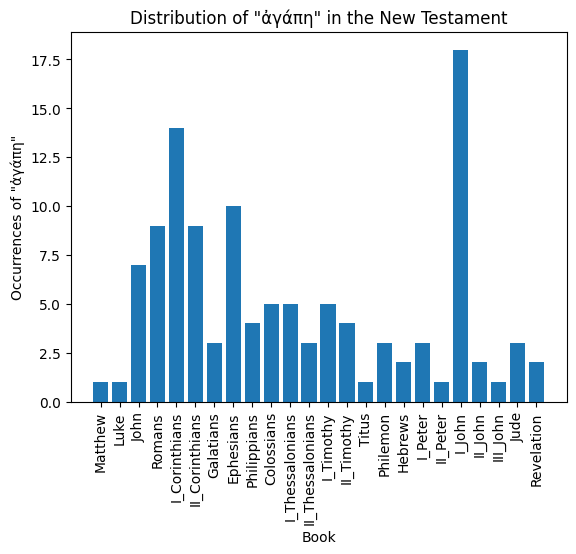

In [8]:
import matplotlib.pyplot as plt

# Get the books and count occurrences of "ἀγάπη" therein
bookCounts = {}
for word in agapeWordNodes:
    book = L.u(word, 'book')[0]
    bookName = F.book.v(book)
    bookCounts[bookName] = bookCounts.get(bookName, 0) + 1

# Plot the results
plt.bar(bookCounts.keys(), bookCounts.values())
plt.xlabel('Book')
plt.ylabel('Occurrences of "ἀγάπη"')
plt.title('Distribution of "ἀγάπη" in the New Testament')
plt.xticks(rotation=90)
plt.show()

## 3.4 - Analyzing co-occurrences <a class="anchor" id="bullet3x4"></a>

The next step is to analyze which words frequently co-occur with "ἀγάπη". This can give us insights into the context in which the word is used. To obtain a set of meaningfull terms we will filter on feature `sp` (part of speech). A reasonable selection could be `subs`,`verb`,`pron`,`adjv` and `advb`. 

In [9]:
from collections import Counter
import pandas as pd

# Initialize the list of co-occurring words and their parts of speech
coOccurringWords = []

# Iterate over all unique verse nodes
for verseNode in uniqeVerseNodes:
    verseWords = L.d(verseNode, 'word')  # Get all word nodes in the verse
    for wordNode in verseWords:
        spOfWord = F.sp.v(wordNode)  # Get the part of speech for the word
        # Check if spOfWord matches any of the specified values
        if spOfWord in {'subs', 'verb', 'pron', 'adjv', 'advb'}:
            # Add the lemma and part of speech of the word to the list
            coOccurringWords.append((F.lemma.v(wordNode), spOfWord))

# Count the frequency of co-occurring words by lemma and part of speech
coOccurringFreq = Counter(coOccurringWords)

# Create and print a DataFrame for better presentation
data = [{'lemma': lemma, 'partOfSpeech': pos, 'occurrences': count}
        for (lemma, pos), count in coOccurringFreq.items()]
df = pd.DataFrame(data).sort_values(by='occurrences', ascending=False)
print (df)

         lemma partOfSpeech  occurrences
3        ἀγάπη         subs          116
30         ἐγώ         pron           59
5           σύ         pron           51
14        θεός         subs           40
36       αὐτός         pron           40
..         ...          ...          ...
47  καταισχύνω         verb            1
48       ἐκχέω         verb            1
80       κακός         adjv            1
81   ἐργάζομαι         verb            1
9      πήγανον         subs            1

[372 rows x 3 columns]


# 4 - Required libraries<a class="anchor" id="bullet4"></a>
##### [Back to ToC](#TOC)

The scripts in this notebook require (beside `text-fabric`) the following Python libraries to be installed in the environment:

    collections
    matplotlib.pyplot
    pandas

You can install any missing library from within Jupyter Notebook using either`pip` or `pip3`.

# 5 - Notebook version details<a class="anchor" id="bullet5"></a>
##### [Back to ToC](#TOC)

<div style="float: left;">
  <table>
    <tr>
      <td><strong>Author</strong></td>
      <td>Tony Jurg</td>
    </tr>
    <tr>
      <td><strong>Version</strong></td>
      <td>1.0</td>
    </tr>
    <tr>
      <td><strong>Date</strong></td>
      <td>16 January 2025</td>
    </tr>
  </table>
</div>